In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


### Load Data

In [69]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [70]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Correlation between the features and the label

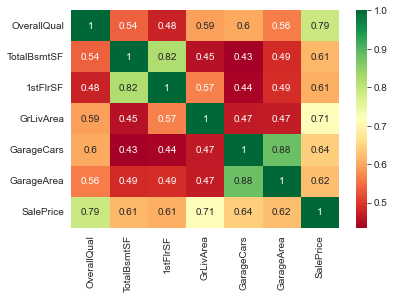

In [71]:
# most correlated features
corr = df_train.corr()
top_corr_features = corr.index[abs(corr["SalePrice"])>0.6]
plt.figure(figsize=(6,4))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

It seems like overall quality(OverallQual) and ground living area (GrLivArea) are highly correlated to SalePrice. <br>
Let's find out the distribution to see how they correlate the sale price.

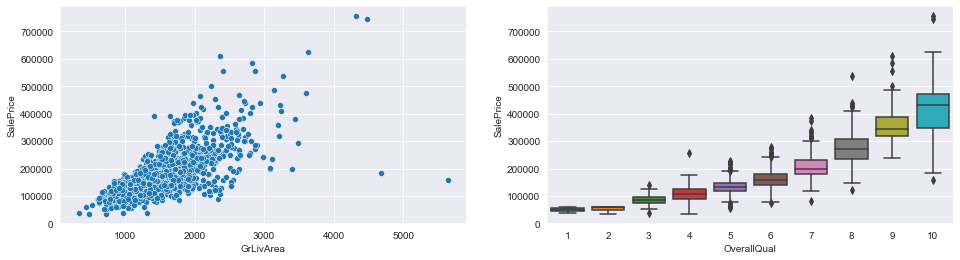

In [72]:
f,ax = plt.subplots(1,2,figsize=(16,4))
sns.set_style("darkgrid")
sns.scatterplot('GrLivArea','SalePrice',data=df_train,ax=ax[0])
sns.boxplot('OverallQual','SalePrice',data=df_train,ax = ax[1])
plt.show()

### Missing Values, errors, or outlier values

In [73]:
null_total = df_train.isnull().sum().sort_values(ascending=False)
null_percentage = (df_train.isnull().sum() / len(df_train)) * 100
null_percentage = null_percentage.drop(null_percentage[null_percentage == 0].index).sort_values(ascending=False)
missing_data = pd.concat([null_total, null_percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


Any features that has missing data more than 5% and not highly correlated with the label are being removed from the dataset.

In [74]:
# removing missing data features
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train = df_train.drop((missing_data[missing_data['Percentage'] > 0.5]).index,1)
# check if there is any missing data left
df_train.isnull().sum().max()

0

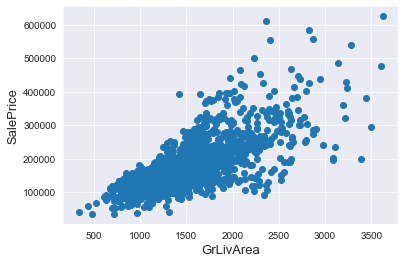

In [75]:
# Removing outliers
df_train = df_train.drop(df_train[(df_train['SalePrice']>700000) | (df_train['GrLivArea']>4000)].index)

# Check the graphic
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### Show data distribution

### Feature Engineering

### Normalisation

### Separate features and labels

### Train the model

### Evaluate the Trained model